Linear regression breaks when data is noisy or features are misleading.
Ridge regression fixes this not by being smarter — but by being disciplined.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)


### What each library does

numpy: create numbers, noise, matrices

matplotlib: visualize lines, points, coefficients

LinearRegression: baseline model (no regularization)

Ridge: same model + L2 penalty

mean_squared_error: quantify how wrong the model is

Overfitting in machine learning occurs when a model learns training data too closely, capturing noise and random fluctuations rather than just the underlying patterns. This results in high accuracy on training data but poor performance on new, unseen data, meaning the model fails to generalize. Common causes include overly complex models, insufficient training data, or training for too long. 

In [16]:
X = np.linspace(0, 10, 30).reshape(-1, 1)
noise = np.random.normal(0, 8, size=30)
y = 3 * X.flatten() + noise


In [17]:
X = np.linspace(0, 10, 30).reshape(-1, 1)


Creates 30 evenly spaced values from 0 to 10

.reshape(-1,1) → ML models expect 2D input

In [18]:
noise = np.random.normal(0, 8, size=30)


Mean = 0 → noise centered

Std = 8 → deliberately large noise

This simulates real-world messy data

In [19]:
y = 3 * X.flatten() + noise


True relationship is y = 3x

Noise hides the true pattern

Overfitting risk introduced intentionally

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [21]:
alphas = [0.1, 1, 10, 100]
ridge_models = [Ridge(alpha=a) for a in alphas]


alpha controls strength of punishment

Larger alpha → stricter discipline

In [22]:
for model in ridge_models:
    model.fit(X, y)


Each Ridge model learns:

min
⁡
∑
(
𝑦
−
𝑋
𝑤
)
2
+
𝛼
𝑤
2
min∑(y−Xw)
2
+αw
2

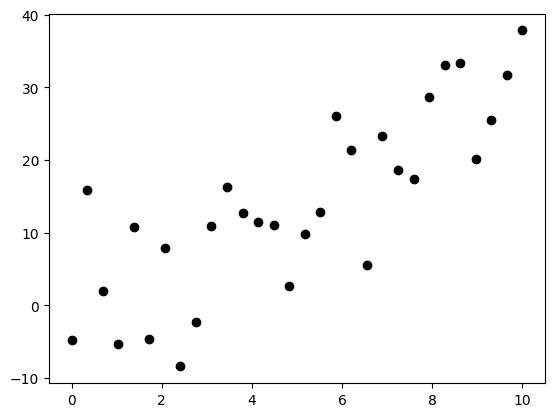

In [23]:
plt.scatter(X, y, label="Data", color="black")


Black dots = reality

Messy and imperfect

In [24]:
x_plot = np.linspace(0, 10, 100).reshape(-1, 1) # smooth line for plotting


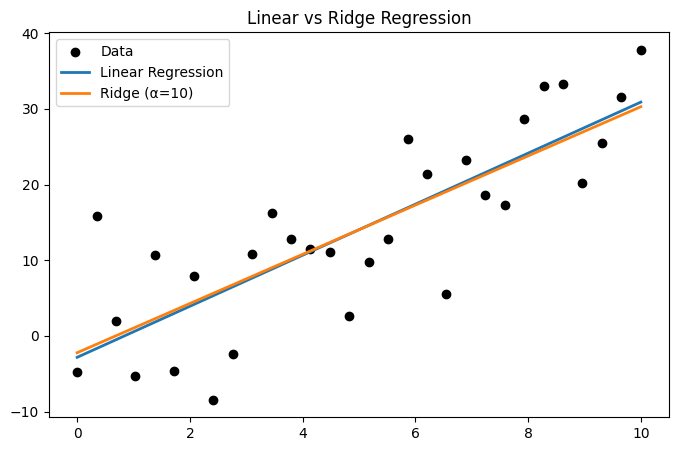

In [28]:
plt.figure(figsize=(8, 5))

# 1. Raw data
plt.scatter(X, y, color="black", label="Data")

# 2. Linear Regression line
plt.plot(
    x_plot,
    lin_reg.predict(x_plot),
    label="Linear Regression",
    linewidth=2
)

# 3. Ridge Regression line
plt.plot(
    x_plot,
    ridge_models[2].predict(x_plot),  # alpha = 10
    label="Ridge (α=10)",
    linewidth=2
)

# 4. Explanation
plt.legend()
plt.title("Linear vs Ridge Regression")
plt.show()


In [29]:
print("Linear coefficient:", lin_reg.coef_[0])
print("Ridge coefficient:", ridge_models[2].coef_[0])  # α = 10


Linear coefficient: 3.371400167910857
Ridge coefficient: 3.249794937973775


Ridge slope < Linear slope

Same direction

Reduced magnitude

This is L2 shrinkage in action.

Ridge regression does not fight error — it fights overconfidence.

Intercept → where you start

Slope → how fast you move

Weights → which directions matter most